In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import math



fifa = pd.read_csv('./fifa21_train.csv')

pd.set_option('display.max_columns', None)

In [2]:
fifa.shape

(11701, 101)

In [3]:
fifa.head()

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,0,"Jan 16, 2015","Dec 31, 2020",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,0,"Jan 31, 2019",NaN,€9M,€49K,€15.3M,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,Right,13,"Jul 1, 2016",NaN,€275K,€4K,€694K,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,Right,8,"Jul 1, 2018",NaN,€725K,€2K,€1.4M,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [4]:
nulls_df = round(pd.DataFrame(fifa.isna().sum())/len(fifa), 4)*100
nulls_df
nulls_df = nulls_df.reset_index()
nulls_df
nulls_df.columns = ['header_name', 'percent_nulls']
display(nulls_df.T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
header_name,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
percent_nulls,0.0,0.0,0.0,0.0,0.15,0.0,2.46,0.0,0.0,0.0,0.0,0.0,0.35,94.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.35,0.0,0.0,0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.35,0.0,0.35,0.0,0.0,0.35,0.0,0.0,0.0,0.0,0.0,0.06,0.06,0.35,0.0,2.38,0.0,0.0,0.0,0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Filling NaN

In [5]:
fifa = fifa.drop(columns = ['Loan Date End', 'Team & Contract','ID','Name','Growth', 'Joined', 'Contract'], axis=1)
fifa.head()

,Age,Nationality,Club,BP,Position,Height,Weight,foot,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,"5'9""",161lbs,Right,€525K,€4K,€801K,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"6'0""",159lbs,Right,€8.5M,€23K,€0,365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,33,Italy,Al Hilal,CAM,CAM CF,"5'4""",134lbs,Right,€9M,€49K,€15.3M,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,22,Wales,Swansea City,CDM,CDM CM,"5'10""",152lbs,Right,€275K,€4K,€694K,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,23,France,US Orléans Loiret Football,CDM,CDM CM,"5'11""",150lbs,Right,€725K,€2K,€1.4M,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [6]:
for col in fifa :
    fifa = fifa[fifa[col].isna()== False]
nulls_df = round(pd.DataFrame(fifa.isna().sum())/len(fifa), 4)*100
nulls_df
nulls_df = nulls_df.reset_index()
nulls_df
nulls_df.columns = ['header_name', 'percent_nulls']
display(nulls_df.T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93
header_name,Age,Nationality,Club,BP,Position,Height,Weight,foot,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
percent_nulls,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
fifa.dtypes

Age             int64
Nationality    object
Club           object
BP             object
Position       object
                ...  
CB             object
RCB            object
RB             object
GK             object
OVA             int64
Length: 94, dtype: object

#### Turning prices into numbers

In [8]:
def clean2(x):
    if type(x) == str :
        x = x.replace("€","")
        x = x.replace(".","")
        if x.endswith("K") :
            x = x.replace("K","000")
        elif x.endswith("M") :
            x = x.replace("M","000000")
    return int(x)

fifa['Value'] = list(map(clean2,fifa['Value']))
fifa['Wage'] = list(map(clean2,fifa['Wage']))
fifa['Release Clause'] = list(map(clean2,fifa['Value']))

In [9]:
def height(x):
    x = x.replace("'","")
    x = x.replace('"',"")
    ft = float(x[0])
    inch = float(x[1:])
    cm = ft*30.48 + inch*2.54
    return float(round(cm, 2))

fifa['Height'] = list(map(height,fifa['Height']))

In [10]:
fifa['W/F'] = list(map(lambda x : x.replace("★",""), fifa['W/F'] ))
fifa['SM'] = list(map(lambda x : x.replace("★",""), fifa['SM'] ))
fifa['IR'] = list(map(lambda x : x.replace("★",""), fifa['IR'] ))
fifa['Weight'] = list(map(lambda x : x.replace("lbs",""), fifa['Weight'] ))
fifa['W/F'] = pd.to_numeric(fifa['W/F'], errors = 'coerce')
fifa['SM'] = pd.to_numeric(fifa['SM'], errors = 'coerce')
fifa['IR'] = pd.to_numeric(fifa['IR'], errors = 'coerce')
fifa['Weight'] = pd.to_numeric(fifa['Weight'], errors = 'coerce')
fifa['Hits'] = pd.to_numeric(fifa['Hits'], errors = 'coerce')

In [11]:
def clean(x):
    if type(x) == str :
        if '+' in x :
            x, y = x.split('+')
            x = int(x)
    return x

for col in fifa :
    fifa[col] = list(map(clean,fifa[col]))


## Separating numeric data

In [12]:
numerical = fifa.select_dtypes([np.number])
numerical.head()

,Age,Height,Weight,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,26,175.26,161,525000,4000,525000,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4,2,1,69,51,63,63,51,60,3.0,58,58,58,61,62,62,62,61,63,63,63,63,63,63,63,63,59,59,59,59,59,58,54,54,54,58,15,64
1,30,182.88,159,85000000,23000,85000000,365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3,4,2,83,75,68,82,33,71,44.0,77,77,77,77,77,77,77,77,76,76,76,76,68,68,68,76,57,53,53,53,57,53,48,48,48,53,18,77
2,33,162.56,134,9000000,49000,9000000,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4,4,2,80,77,78,86,27,56,73.0,73,73,73,80,79,79,79,80,80,80,80,79,74,74,74,79,59,56,56,56,59,53,41,41,41,53,12,80
3,22,177.80,152,275000,4000,275000,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2,2,1,57,44,54,57,57,60,7.0,50,50,50,51,51,51,51,51,53,53,53,53,56,56,56,53,56,58,58,58,56,57,58,58,58,57,14,59
4,23,180.34,150,725000,2000,725000,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2,3,1,66,44,60,64,60,66,4.0,56,56,56,59,59,59,59,59,61,61,61,62,63,63,63,62,64,64,64,64,64,63,61,61,61,63,15,65


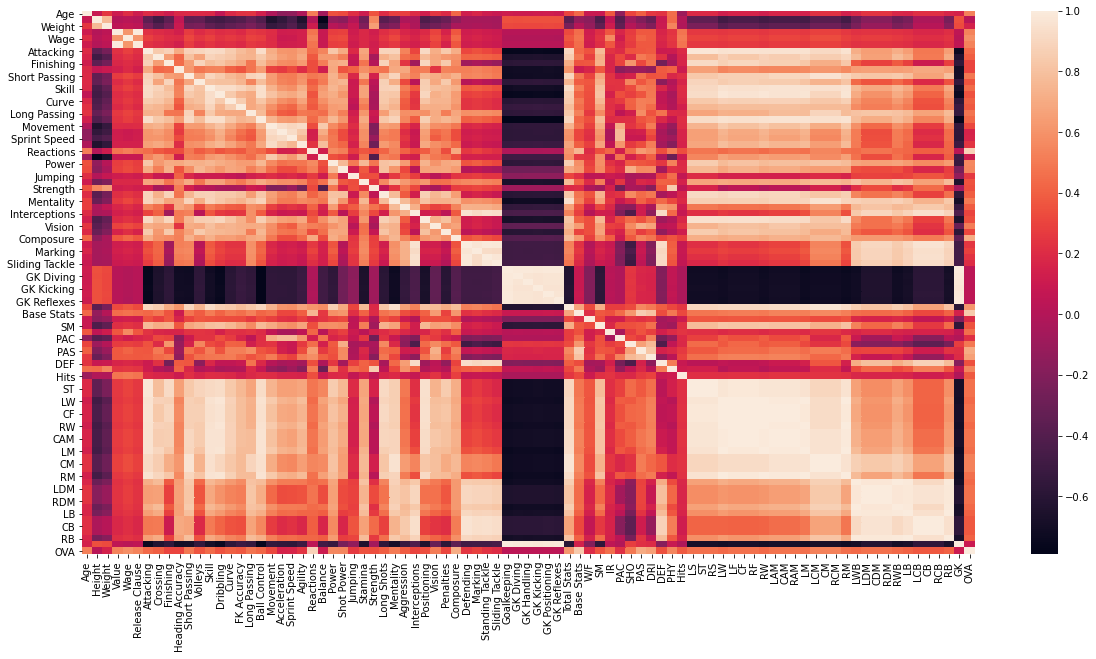

In [13]:
plt.figure(figsize = (20,10))

ax = sns.heatmap(numerical.corr())

In [14]:
# Dropping growth
# Dropping GK Diving, GK Handling, GK Kicking, GK Positioning, GK Reflexes, ST, RS, 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', CDM, RDM
numerical = numerical.drop(['GK Diving','Agility','LCB', 'LCM','GK Handling','Crossing','FK Accuracy','Total Stats', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'ST', 'RS', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'CDM', 'RDM','CM', 'RCM','CB', 'RCB', 'LDM', 'Dribbling', 'Curve','RWB','RM', 'LB', 'LW', 'LM', 'Acceleration','Release Clause', 'RB', 'Sprint Speed','Hits', 'Marking','Standing Tackle', 'Sliding Tackle'], axis = 1)

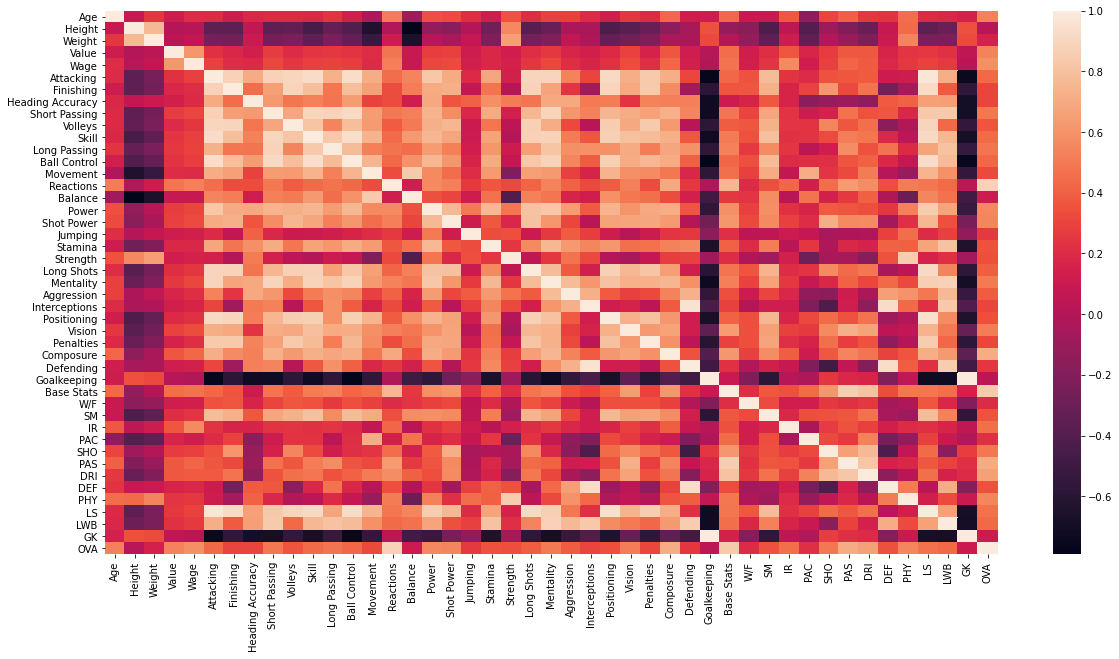

In [15]:
plt.figure(figsize = (20,10))

ax = sns.heatmap(numerical.corr())

### X-y split

In [16]:
X_num = numerical.drop(columns = ['OVA'])
y = numerical['OVA']

## Categorical

In [17]:
categorical = fifa.select_dtypes(include = object)

In [18]:
label_encoded = pd.DataFrame(data = None,columns=categorical.columns)

for col in label_encoded :
    label_encoded[col] = LabelEncoder().fit(categorical[col]).transform(categorical[col])
label_encoded.head()

,Nationality,Club,BP,Position,foot,A/W,D/W
0,137,299,4,153,1,0,2
1,28,98,14,519,1,0,1
2,72,41,0,4,1,0,2
3,154,745,2,91,1,2,2
4,50,776,2,91,1,1,2


#### Concatenating

In [19]:
X_num.index = label_encoded.index
X = pd.concat([label_encoded, X_num], axis = 1)
X.head()

,Nationality,Club,BP,Position,foot,A/W,D/W,Age,Height,Weight,Value,Wage,Attacking,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Long Passing,Ball Control,Movement,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Goalkeeping,Base Stats,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY,LS,LWB,GK
0,137,299,4,153,1,0,2,26,175.26,161,525000,4000,258,47,43,70,44.0,286,63,63,346,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,48,357,4,2,1,69,51,63,63,51,60,58,59,15
1,28,98,14,519,1,0,1,30,182.88,159,85000000,23000,365,79,76,68,76.0,375,63,79,404,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,55,412,3,4,2,83,75,68,82,33,71,77,57,18
2,72,41,0,4,1,0,2,33,162.56,134,9000000,49000,336,76,34,78,75.0,424,74,85,424,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,21,404,4,4,2,80,77,78,86,27,56,73,59,12
3,154,745,2,91,1,2,2,22,177.80,152,275000,4000,242,42,58,62,36.0,259,57,61,282,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,42,329,2,2,1,57,44,54,57,57,60,50,56,14
4,50,776,2,91,1,1,2,23,180.34,150,725000,2000,249,37,61,68,34.0,280,61,66,324,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,52,360,2,3,1,66,44,60,64,60,66,56,64,15


In [20]:
transformer = MinMaxScaler().fit(X)
X_normalized = transformer.transform(X)
X = round(pd.DataFrame(X_normalized, columns=X.columns), 2)
X.shape

(11211, 51)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lm = linear_model.LinearRegression() 



lm.fit(X_train,y_train)
predictions = lm.predict(X_train)

r2 = r2_score(y_train, predictions)
mse = mean_squared_error(y_train, predictions)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_train, predictions)

print('r2_train:', r2)
print('mse_train:', mse)
print('rmse_train:', rmse)
print('mae_train:', mae)
predictions = lm.predict(X_test)

r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)

print('r2_test:', r2)
print('mse_test:', mse)
print('rmse_test:', rmse)
print('mae_test:', mae)

r2_train: 0.9077633874303923
mse_train: 4.365336029192439
rmse_train: 2.089338658330056
mae_train: 1.6347864873526643
r2_test: 0.9119852210907964
mse_test: 4.127704120463729
rmse_test: 2.0316752005337193
mae_test: 1.5875244221359373
